# Vendas varejo

- Projeto sobre o varejo de vendas de um hipermercado, fazendo análise e previsão de séries temporais com Python.
- Projeto, este que foi publicado no medium.com pela Sr Data Scientist Susian Li, de Toronto, Canadá.
- Link para o arquivo de estudo: https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls


#### Entendimento;

##### A análise de séries temporais compreende métodos para analisar dados de séries temporais para extrair estatísticas significativas e outras características dos dados. A previsão de séries temporais é o uso de um modelo para prever valores futuros com base em valores observados anteriormente. As séries temporais são amplamente utilizadas para dados não estacionários, como economia, industria, clima, preço das ações e vendas no varejo como neste projeto. Demonstraremos diferentes abordagens para prever séries temporais de vendas no varejo.

Vamos começar!

In [2]:
# Importando as bibliotecas
import warnings 
import itertools 
import numpy as np 
import matplotlib.pyplot as plt 
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 
import pandas as pd 
import statsmodels.api as sm 
import matplotlib
%matplotlib inline

matplotlib.rcParams['axes.labelsize'] = 14 
matplotlib.rcParams['xtick.labelsize'] = 12 
matplotlib.rcParams['ytick.labelsize'] = 12 
matplotlib.rcParams['text.color'] = 'k'

Existem várias categorias nos dados de vendas do hipermercado, para essa análise de séries temporal e previsão de vendas, iremos focar em móveis.

In [3]:
df = pd.read_excel("Superstore.xls")
furniture = df.loc[df['Category'] == 'Furniture']

Temos bons dados de vendas de móveis de 4 anos.

In [4]:
# Visualizando as datas de vendas
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

Pré-processamento de dados

Esta etapa inclui remover colunas desnecessárias, verificar valores ausentes, agregar vendas por data e assim por diante. 

In [5]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',
'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True) # Removendo colunas desnecessárias
furniture = furniture.sort_values('Order Date') # Ordenando por datas
furniture.isnull().sum() # Verificando se há valores nulos

Order Date    0
Sales         0
dtype: int64

In [6]:
# Agrupando por data, somando as vendas e ordenando o índice
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index() 

Indexação com dados de série temporal

In [7]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

Nossos dados atuais de data e hora podem ser difíceis de se trabalhar, portanto, usaremos o valor médio de vendas diárias por mês e usaremos o início de cada mês como representação de data/hora.

In [8]:
y = furniture['Sales'].resample('MS').mean()

Vamos dar uma olhada rápida nos dados de vendas de móveis de 2017.

In [9]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

Visualizando Dados de Séries Temporais de Vendas de Móveis

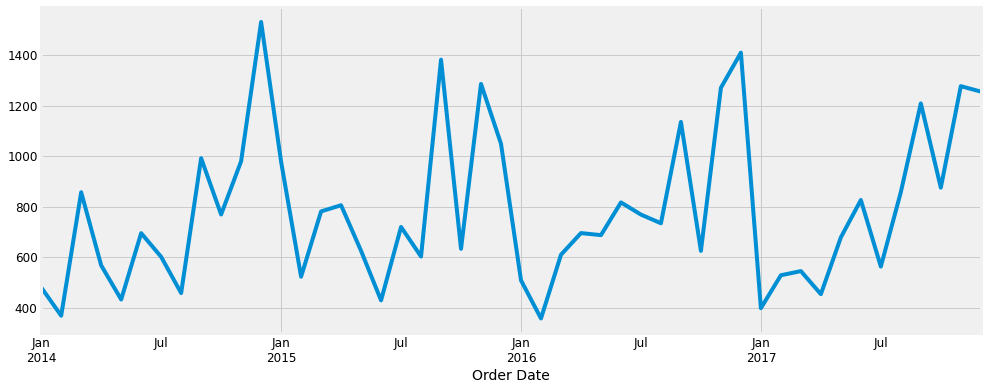

In [10]:
y.plot(figsize=(15, 6)) 
plt.show()

Alguns padrões distinguíveis aparecem quando plotamos os dados. A série temporal tem padrão de sazonalidade, como as vendas são sempre baixas no início do ano e altas no final do ano. Há sempre uma tendência de alta em um único ano com alguns meses de baixa no meio do ano.

Também podemos visualizar nossos dados usando um método chamado decomposição de séries temporais que nos permite decompor nossas séries temporais em três componentes distintos: tendência, sazonalidade e ruído.

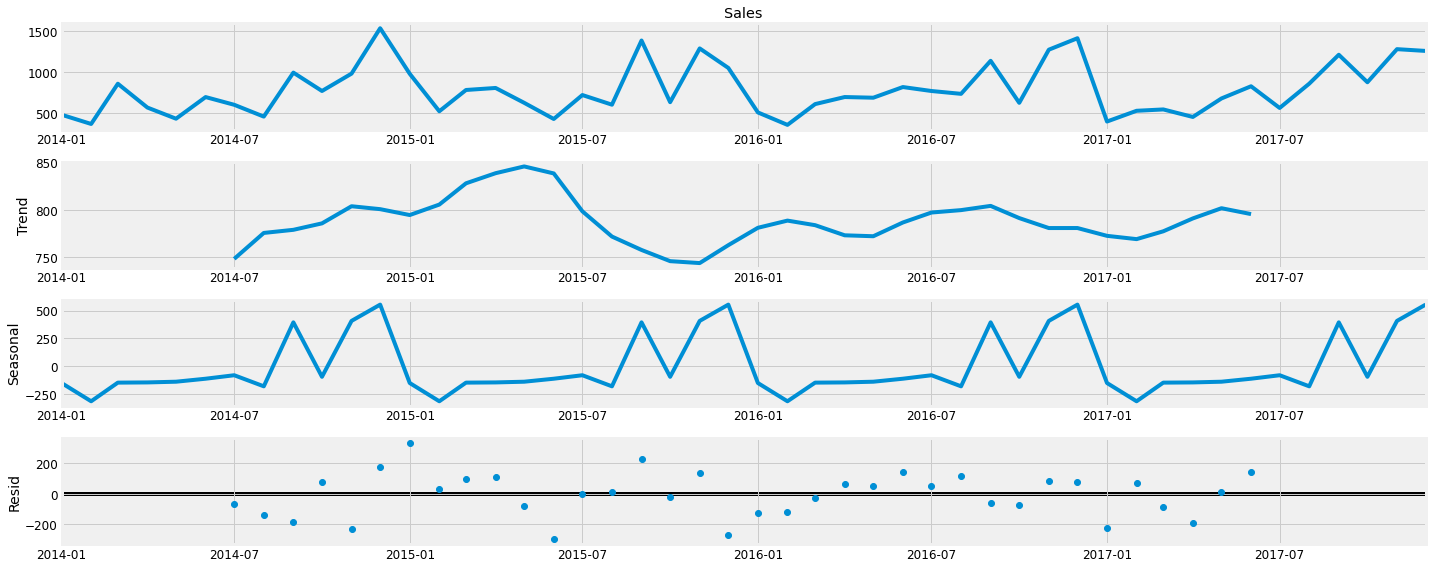

In [11]:
from pylab import rcParams # Importando utilizando a biblioteca pylab e o método rcParams
rcParams['figure.figsize'] = 20, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive') # Decompondo a série temporal
fig = decomposition.plot()
plt.show()

O gráfico acima mostra claramente que as vendas de móveis são instáveis, junto com sua sazonalidade.

### Previsão de séries temporais com ARIMA
Vamos aplicar um dos métodos mais usados ​​para previsão de séries temporais, conhecido como ARIMA, que significa auto-regressivo integrado de médias móveis. (Autoregressive Integrated Moving Average)

Os modelos ARIMA são indicados com a notação ARIMA(p, d, q). Esses três parâmetros são responsáveis ​​pela sazonalidade, tendência e ruído nos dados:

In [12]:
p = d = q = range(0, 2) # Definindo os parâmetros p, d e q
pdq = list(itertools.product(p, d, q)) # Criando uma lista com todas as combinações possíveis de p, d e q
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Criando uma nova lista com as combinações possíveis de p, d e q para a sazonalidade
print('Exemplos de combinações de parâmetros para Sazonal ARIMA...') # Título
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2])) 
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Exemplos de combinações de parâmetros para Sazonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Esta etapa é a Seleção de parâmetros para o modelo de série temporal ARIMA de vendas de nossos móveis. Nosso objetivo aqui é usar uma “pesquisa de grade” para encontrar o conjunto ideal de parâmetros que produz o melhor desempenho para nosso modelo.

In [13]:
for param in pdq: # Loop para os parâmetros
    for param_seasonal in seasonal_pdq: # Loop para os parâmetros sazonais
        try:
            mod = sm.tsa.statespace.SARIMAX(y, # Modelo SARIMAX
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit() # Ajustando o modelo
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic)) # Imprimindo o AIC
        except: 
            continue # Caso ocorra algum erro, o loop continua

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1567.4749351262863
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130919703
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.27028997937225
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418338
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:478.27925331444305
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341


c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.24882803027265
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758109
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2792.7305904497425
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.5607429809151
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.6261389673286


c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.5939736037459
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:467.5411446812593
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.98848769468657


c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.8725576520773
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.8947668414504
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1702.98094211437
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785672393664
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:304.96712281679675
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.7889663004408


c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1391.475492160685
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109212
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:306.91132001514205
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176817011
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2631.558295516968
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.8705548482669
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.5806233350454
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.1832977442628


c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2611.9128605470173
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.75743684173403
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.5576621461241
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067712
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1533.050667691765
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.4632147852136


c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:304.2077675160967
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.92593679352103
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:479.7837403343145
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.46646750845866
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:304.58426921438974
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.779444218584
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2354.027677391038
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.3685195815071


c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:293.342219396592
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.57633238771126


c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:468.1895912739669
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.01560021183786
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:293.7513188128095
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1627.4091597027148
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2003422281134
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:300.2130611619096
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.34036587860766
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1444.0749377954123


c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.6270901345419
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:302.3264992507354
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835406
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:316.3558250046914
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.476268760992
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:281.3873006939381
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.5250354660848


c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:641.7005300901014
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.7875439537269
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:283.3661014415818


A saída acima sugere que SARIMAX (1, 1, 1) x (1, 1, 1, 12) produz o AIC valor mais baixo de 283,36. Portanto, devemos considerar isso como a opção ideal.

### Ajustando o modelo ARIMA

In [14]:
mod = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_invertibility=False) # Modelo SARIMAX com os parâmetros que apresentaram o menor AIC
results = mod.fit() # Ajustando o modelo
print(results.summary().tables[1]) # Imprimindo o resumo do modelo

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0854      0.240      0.356      0.722      -0.385       0.556
ma.L1         -1.0000   3195.534     -0.000      1.000   -6264.132    6262.132
ar.S.L12       0.0274      0.513      0.053      0.957      -0.977       1.032
ma.S.L12      -1.0001   3195.191     -0.000      1.000   -6263.460    6261.460
sigma2      2.715e+04      0.051   5.37e+05      0.000    2.71e+04    2.71e+04


Executando o diagnósticos de modelo para investigar qualquer comportamento incomum.

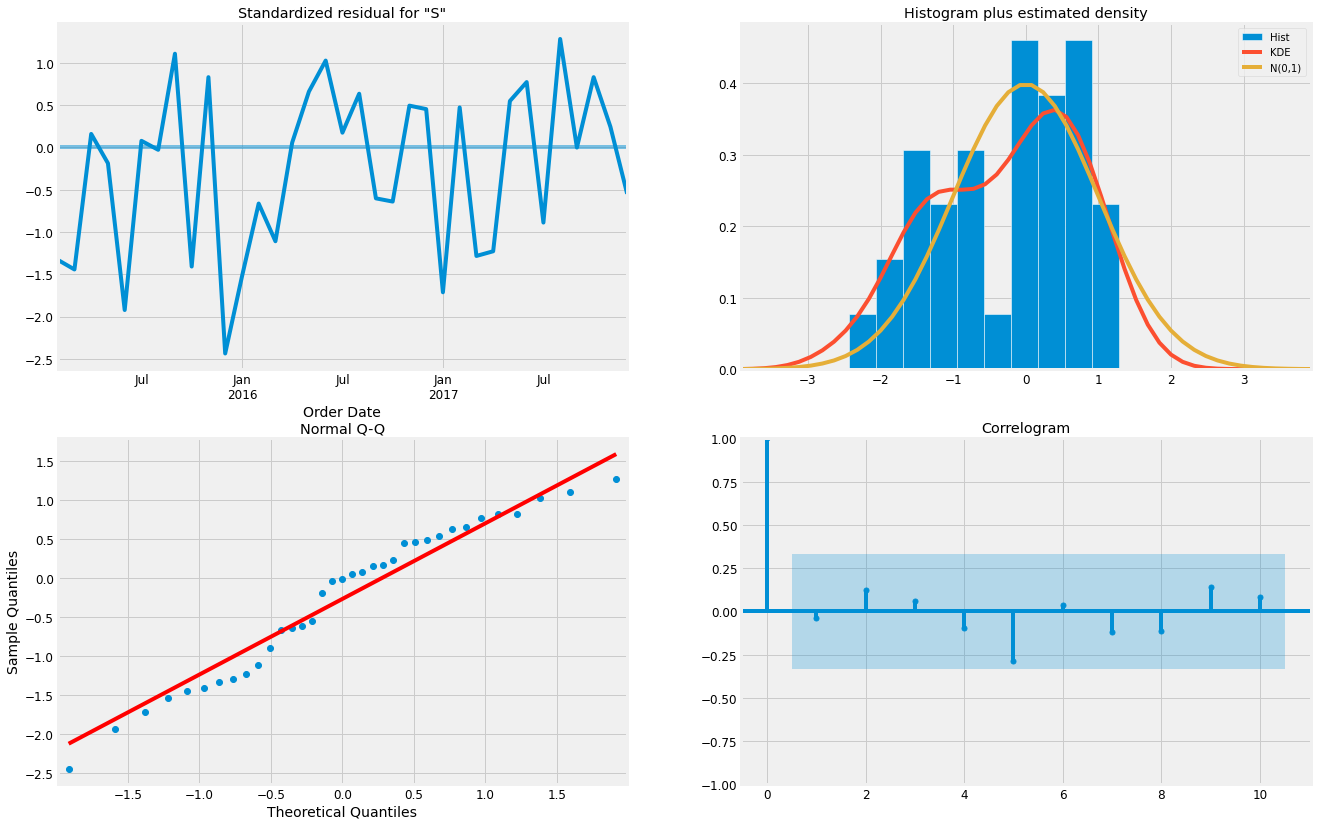

In [15]:
results.plot_diagnostics(figsize=(20,14)) # Plotando o diagnóstico do modelo
plt.show()

Não é perfeito, no entanto, o diagnóstico de modelo sugere que os resíduos do modelo estão distribuídos quase normalmente.

### Validando previsões
Para ajudar a entender a precisão das previsões, comparamos as vendas previstas com as vendas reais da série temporal e definimos as previsões para começar em 2017–01–01 até o final dos dados.

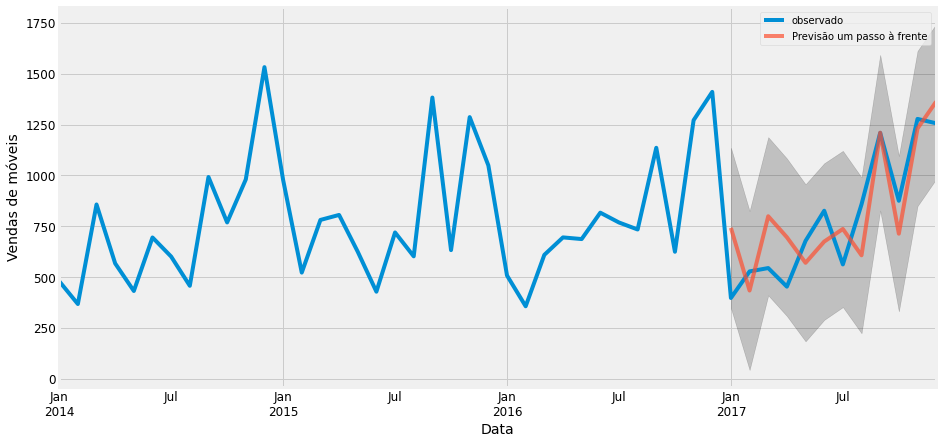

In [16]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False) # Obtendo as previsões, a partir de 2017
pred_ci = pred.conf_int() # Obtendo o intervalo de confiança
ax = y['2014':].plot(label='observado') # Plotando os dados observados
pred.predicted_mean.plot(ax=ax, label='Previsão um passo à frente', alpha=.7, figsize=(14, 7) ) # Plotando as previsões
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], color='k', alpha=.2) # Plotando o intervalo de confiança
ax.set_xlabel('Data') # Definindo o título do eixo x
ax.set_ylabel('Vendas de móveis') # Definindo o título do eixo y
plt.legend()
plt.show()

O gráfico de linha está mostrando os valores observados em comparação com as previsões de previsão contínuas. No geral, nossas projeções se alinham muito bem com os valores reais, mostrando uma tendência de alta desde o início do ano e capturando a sazonalidade no final do ano.

In [17]:
y_forecasted = pred.predicted_mean 
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean() 
print('O erro quadrático médio de nossas previsões é {}'.format(round(mse, 2)))

O erro quadrático médio de nossas previsões é 34904.03


In [18]:
print('A raiz do erro quadrático médio de nossas previsões é {}'.format(round(np.sqrt(mse), 2)))

A raiz do erro quadrático médio de nossas previsões é 186.83


O mean squared error (MSE), de um estimador mede a média dos quadrados dos erros – ou seja, a diferença quadrática média entre os valores estimados e o que é estimado. O MSE é uma medida da qualidade de um estimador - é sempre não negativo e, quanto menor o MSE, mais perto estamos de encontrar a linha de melhor ajuste.

O Root Mean Square Error (RMSE), nos diz que nosso modelo foi capaz de prever a média diária de vendas de móveis no conjunto de teste dentro de 186,83 das vendas reais. Nossas vendas diárias de móveis variam de cerca de 400 a mais de 1200. Na minha opinião, este é um bom modelo até agora.

### Produção e visualização de previsões

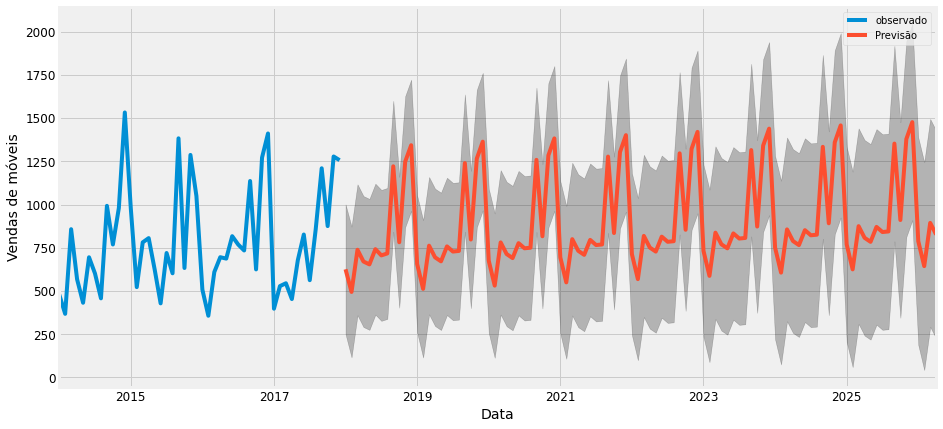

In [19]:
pred_uc = results.get_forecast(steps=100) # Obtendo as previsões para os próximos 100 meses
pred_ci = pred_uc.conf_int() # inserindo o intervalo de confiança
ax = y.plot(label='observado', figsize=(14, 7)) # Plotando os dados observados
pred_uc.predicted_mean.plot(ax=ax, label='Previsão') # Plotando as previsões
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], color='k', alpha=.25) # Plotando o intervalo de confiança
ax.set_xlabel('Data') 
ax.set_ylabel('Vendas de móveis')
plt.legend() 
plt.show()

Nosso modelo claramente capturou a sazonalidade das vendas de móveis. À medida que prevemos mais para o futuro, é natural que nos tornemos menos confiantes em nossos valores. Isso se reflete nos intervalos de confiança gerados pelo nosso modelo, que crescem à medida que avançamos para o futuro.

A análise da série temporal acima para móveis me deixa curioso sobre outras categorias, e como eles se comparam entre si ao longo do tempo. Por isso, vamos comparar série temporal de móveis com móveis de escritórios.

### Série temporal de Móveis VS Móveis de escritórios.

De acordo com nossos dados, houve muito mais vendas de Materiais de Escritório do que de Móveis ao longo dos anos.

In [20]:
furniture = df.loc[df['Category'] == 'Furniture'] # Selecionando os dados de móveis
office = df.loc[df['Category'] == 'Office Supplies'] # Selecionando os dados de suprimentos de escritório
furniture.shape, office.shape

((2121, 21), (6026, 21))

### Explorando dados

Vamos comparar as vendas de duas categorias no mesmo período. Isso significa combinar dois quadros de dados em um e traçar as séries temporidas dessas duas categorias em um gráfico.

In [21]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
'Product Name', 'Quantity', 'Discount', 'Profit'] # Definindo as colunas que serão excluídas
furniture.drop(cols, axis=1, inplace=True) # Excluindo as colunas dos dados de móveis
office.drop(cols, axis=1, inplace=True) # Excluindo as colunas dos dados de suprimentos de escritório
furniture = furniture.sort_values('Order Date') # Ordenando os dados de móveis por data
office = office.sort_values('Order Date') # Ordenando os dados de suprimentos de escritório por data
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index() # Agrupando os dados de móveis por data e somando as vendas
office = office.groupby('Order Date')['Sales'].sum().reset_index() # Agrupando os dados de suprimentos de escritório por data e somando as vendas
furniture = furniture.set_index('Order Date') # Definindo a data como índice dos dados de móveis
office = office.set_index('Order Date') # Definindo a data como índice dos dados de suprimentos de escritório
y_furniture = furniture['Sales'].resample('MS').mean() # Resample para os dados de móveis, para que os dados fiquem mensais
y_office = office['Sales'].resample('MS').mean() # Resample para os dados de suprimentos de escritório, para que os dados fiquem mensais
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values}) # Criando um dataframe com os dados de móveis
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values}) # Criando um dataframe com os dados de suprimentos de escritório
store = furniture.merge(office, how='inner', on='Order Date') # Juntando os dados de móveis e suprimentos de escritório em um único dataframe
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True) # Renomeando as colunas do novo dataframe
store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


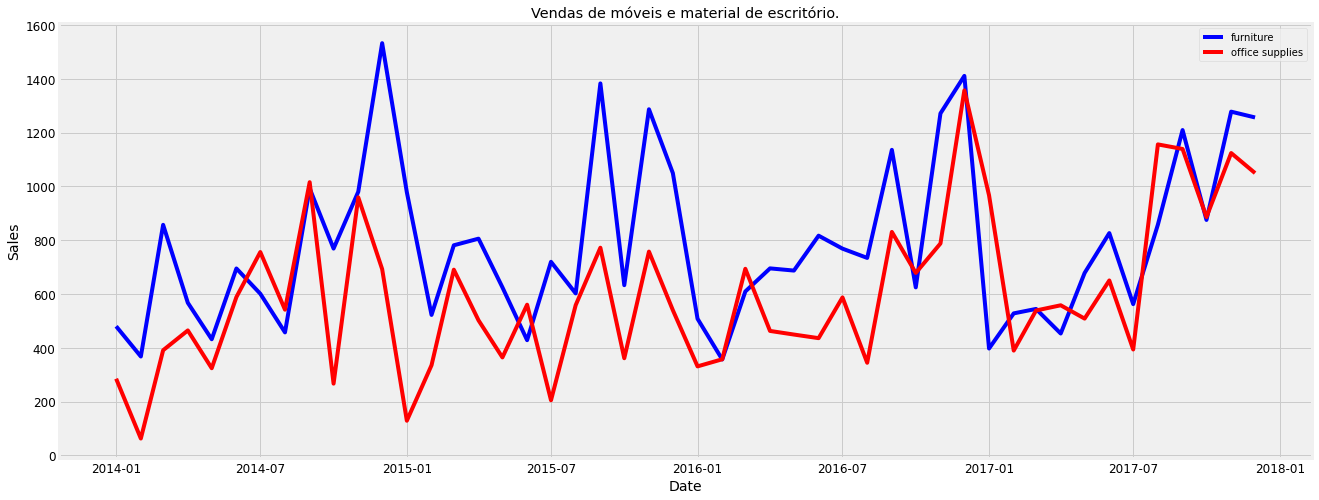

In [22]:
# Plotando os dados de móveis e suprimentos de escritório
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture') # Plotando os dados de móveis, por data e venda.
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies') # Plotando os dados de suprimentos de escritório, por data e venda.
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Vendas de móveis e material de escritório.')
plt.legend();

Observamos que as vendas de móveis e materiais de escritório compartilhavam um padrão sazonal semelhante. O início do ano é a off season para ambas as categorias. Parece que o horário de verão é tranquilo para materiais de escritório também. além disso, as vendas diárias médias de móveis são maiores do que as de material de escritório na maioria dos meses. É compreensível, pois o valor dos móveis deve ser muito maior do que o dos materiais de escritório. Ocasionalmente, os materiais de escritório passavam os móveis em média as vendas diárias. Vamos descobrir quando foi a primeira vez que as vendas de materiais de escritório superaram as dos móveis.

In [23]:
# Obtendo a primeira data em que as vendas de suprimentos de escritório foram maiores que as de móveis
first_date = store.loc[np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0])), 'Order Date'] # criando uma variável, usando np.min para pegar o menor valor da lista, e np.where para encontrar o índice do primeiro valor em que as vendas de suprimentos de escritório foram maiores que as de móveis
print("Materiais de escritório pela primeira vez produziram vendas mais altas do que móveis em {}!".format(first_date.date()))

Materiais de escritório pela primeira vez produziram vendas mais altas do que móveis em 2014-07-01!
